In [4]:
## HackBio Internship

In [137]:
# Install all necessary libraries
! pip install chembl-webresource-client
! pip install rdkit-pypi
! pip install mordred

In [138]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

In [139]:
# Target search for PGK1
my_target = new_client.target
target_query = my_target.search('PGK1')

In [140]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00560', 'xref_name': None, 'xre...",Saccharomyces cerevisiae S288c,Phosphoglycerate kinase 1,19.0,False,CHEMBL2674,"[{'accession': 'P00560', 'component_descriptio...",SINGLE PROTEIN,559292
1,[],Rattus norvegicus,Phosphoglycerate kinase 1,19.0,False,CHEMBL2176815,"[{'accession': 'P16617', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P00558', 'xref_name': None, 'xre...",Homo sapiens,Phosphoglycerate kinase 1,14.0,False,CHEMBL2886,"[{'accession': 'P00558', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Phosphoglycerate kinase,12.0,False,CHEMBL2096677,"[{'accession': 'P00558', 'component_descriptio...",PROTEIN FAMILY,9606


In [141]:
# Select and retrieve bioactivity data for PGK1
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL2886'

In [142]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [143]:
df = pd.DataFrame.from_dict(res)

In [144]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,16372704,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,6.66
1,None,None,16372705,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,16372706,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,16372707,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,16372708,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [145]:
# Handling missing data
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]

In [146]:
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,16372704,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,6.66
1,None,None,16372705,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,16372706,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,16372707,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,16372708,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,None,None,16372790,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,2.53
87,None,None,16372791,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,24.0
88,None,None,16372792,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,4.64
89,None,None,16372793,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,50.0


In [147]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,16372704,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,6.66
1,None,None,16372705,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,16372706,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,16372707,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,None,16372708,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,None,None,16372790,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,2.53
87,None,None,16372791,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,24.0
88,None,None,16372792,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,4.64
89,None,None,16372793,[],CHEMBL3734162,Inhibition of PGK1 (unknown origin) pre-incuba...,B,None,None,BAO_0000190,...,Homo sapiens,Phosphoglycerate kinase 1,9606,None,None,IC50,uM,UO_0000065,None,50.0


In [148]:
# Data pre-processing of the bioactivity data
# Combine the 3 columns (molecule_chembl_id, canonical_smiles, standard_value) and bioactivity_class into a DataFrame
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,6660.0
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,10000.0
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,10000.0
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,9000.0
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,10000.0
...,...,...,...
86,CHEMBL3730340,CCNc1nc2cc(OC)c(OC)cc2nc1NC,2530.0
87,CHEMBL3728093,CNc1nc2cc(OC)c(OC)cc2nc1Cl,24000.0
88,CHEMBL3731151,CCNc1nc2cc(OC)c(OC)cc2nc1Br,4640.0
89,CHEMBL3732814,CCNc1nc2cc(OC)c(OC)cc2nc1NCC,50000.0


In [17]:
# Labeling compounds as either being active, inactive or intermediate
bioactivity_class = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
      bioactivity_class.append("active")
  else:
        bioactivity_class.append("intermediate")

In [149]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,6660.0
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,10000.0
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,10000.0
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,9000.0
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,10000.0


In [150]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,6660.0,intermediate
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,10000.0,inactive
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,10000.0,inactive
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,9000.0,intermediate
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,10000.0,inactive
...,...,...,...,...
86,CHEMBL3730340,CCNc1nc2cc(OC)c(OC)cc2nc1NC,2530.0,intermediate
87,CHEMBL3728093,CNc1nc2cc(OC)c(OC)cc2nc1Cl,24000.0,inactive
88,CHEMBL3731151,CCNc1nc2cc(OC)c(OC)cc2nc1Br,4640.0,intermediate
89,CHEMBL3732814,CCNc1nc2cc(OC)c(OC)cc2nc1NCC,50000.0,inactive


In [151]:
## **Calculate Lipinski descriptors**
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

  moldata= []
  for elem in smiles:
    if isinstance(elem, str):
      mol=Chem.MolFromSmiles(elem)
      moldata.append(mol)

  baseData= [] # Initialize as an empty list

  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])

    baseData.append(row) # Append the row to the list

  # Convert the list to a NumPy array and create the DataFrame
  baseData = np.array(baseData)
  columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData,columns=columnNames)

  return descriptors

In [152]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,310.357,3.1408,1.0,6.0
1,349.866,2.9654,3.0,6.0
2,393.491,3.6068,1.0,7.0
3,378.860,3.2116,2.0,7.0
4,363.848,5.5438,1.0,4.0
...,...,...,...,...
86,262.313,2.1205,2.0,6.0
87,253.689,2.3421,1.0,5.0
88,312.167,2.8413,1.0,5.0
89,276.340,2.5106,2.0,6.0


In [153]:
# Concatenation of DataFrame4 and Lipinski DataFrame
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,6660.0,intermediate,310.357,3.1408,1.0,6.0
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,10000.0,inactive,349.866,2.9654,3.0,6.0
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,10000.0,inactive,393.491,3.6068,1.0,7.0
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,9000.0,intermediate,378.860,3.2116,2.0,7.0
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,10000.0,inactive,363.848,5.5438,1.0,4.0
...,...,...,...,...,...,...,...,...
86,CHEMBL3730340,CCNc1nc2cc(OC)c(OC)cc2nc1NC,2530.0,intermediate,262.313,2.1205,2.0,6.0
87,CHEMBL3728093,CNc1nc2cc(OC)c(OC)cc2nc1Cl,24000.0,inactive,253.689,2.3421,1.0,5.0
88,CHEMBL3731151,CCNc1nc2cc(OC)c(OC)cc2nc1Br,4640.0,intermediate,312.167,2.8413,1.0,5.0
89,CHEMBL3732814,CCNc1nc2cc(OC)c(OC)cc2nc1NCC,50000.0,inactive,276.340,2.5106,2.0,6.0


In [154]:
df_combined.standard_value.describe()

,standard_value
count,91
unique,84
top,10000.0
freq,4


In [155]:
# Convert IC50 to pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
      try: #this will try to convert i to a float
        i = float(i)
      except ValueError: # if i is not a number, set molar to 0
        molar = 0
      else:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x

In [156]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,intermediate,310.357,3.1408,1.0,6.0,5.176526
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,inactive,349.866,2.9654,3.0,6.0,5.000000
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,inactive,393.491,3.6068,1.0,7.0,5.000000
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,intermediate,378.860,3.2116,2.0,7.0,5.045757
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,inactive,363.848,5.5438,1.0,4.0,5.000000
...,...,...,...,...,...,...,...,...
86,CHEMBL3730340,CCNc1nc2cc(OC)c(OC)cc2nc1NC,intermediate,262.313,2.1205,2.0,6.0,5.596879
87,CHEMBL3728093,CNc1nc2cc(OC)c(OC)cc2nc1Cl,inactive,253.689,2.3421,1.0,5.0,4.619789
88,CHEMBL3731151,CCNc1nc2cc(OC)c(OC)cc2nc1Br,intermediate,312.167,2.8413,1.0,5.0,5.333482
89,CHEMBL3732814,CCNc1nc2cc(OC)c(OC)cc2nc1NCC,inactive,276.340,2.5106,2.0,6.0,4.301030


In [157]:
# remove NaN if any
df_cleaned = df_final.dropna()
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3727999,CCNc1nc2cc(OC)c(OC)cc2nc1-c1ccncc1,intermediate,310.357,3.1408,1.0,6.0,5.176526
1,CHEMBL3732705,CCNc1nc2cc(Cl)c(N3CC(CCO)C3)cc2nc1NCC,inactive,349.866,2.9654,3.0,6.0,5.000000
2,CHEMBL3732279,COc1cc2nc(NCCCN3CCCC3)c(-c3ccncc3)nc2cc1OC,inactive,393.491,3.6068,1.0,7.0,5.000000
3,CHEMBL3731887,CCNc1nc2cc(Cl)c(CC(=O)CCC(=O)OC)cc2nc1NCC,intermediate,378.860,3.2116,2.0,7.0,5.045757
4,CHEMBL3732578,CCNc1nc2cc(OC)c(Cl)cc2nc1-c1cccc2ccccc12,inactive,363.848,5.5438,1.0,4.0,5.000000
...,...,...,...,...,...,...,...,...
86,CHEMBL3730340,CCNc1nc2cc(OC)c(OC)cc2nc1NC,intermediate,262.313,2.1205,2.0,6.0,5.596879
87,CHEMBL3728093,CNc1nc2cc(OC)c(OC)cc2nc1Cl,inactive,253.689,2.3421,1.0,5.0,4.619789
88,CHEMBL3731151,CCNc1nc2cc(OC)c(OC)cc2nc1Br,intermediate,312.167,2.8413,1.0,5.0,5.333482
89,CHEMBL3732814,CCNc1nc2cc(OC)c(OC)cc2nc1NCC,inactive,276.340,2.5106,2.0,6.0,4.301030


In [158]:
df_cleaned.pIC50.describe()

,pIC50
count,91.000000
mean,6.253314
std,0.917376
min,4.301030
25%,5.658026
50%,6.148742
75%,6.896250
max,9.000000


In [159]:
# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

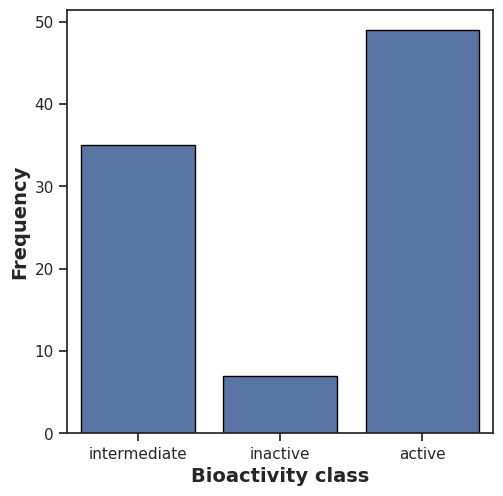

In [160]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')


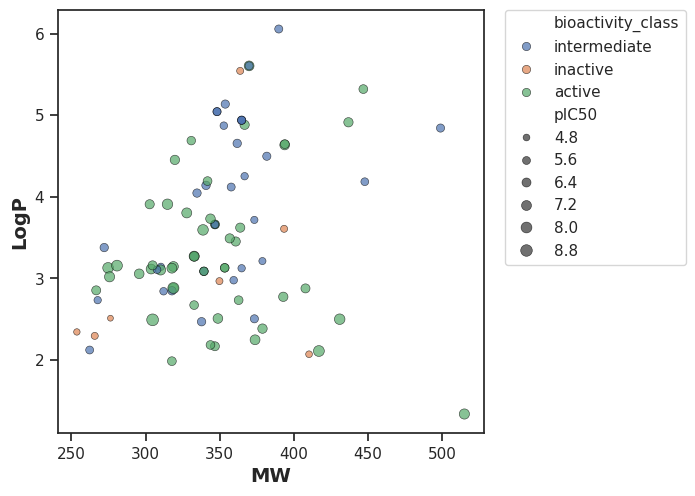

In [161]:
# Scatter plot of MW versus LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [162]:
# Statistical analysis | Mann-Whitney U Test
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  # seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

  #interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [163]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,343.0,0.000023,0.05,Different distribution (reject H0)


In [164]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information in his blog: https://www.blogger.com/profile/18223198920629617711
def canonical__smiles(smiles, verbose=False):
  mols = [Chem.MolFromSmiles(i) for i in smiles]
  smiles = [Chem.MolToSmiles(mol) for mol in mols]
  return smiles

In [165]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

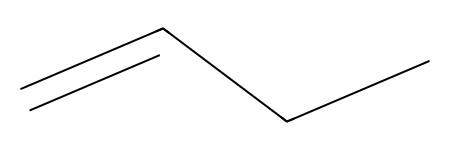

In [166]:
Chem.MolFromSmiles('C=CCC')

In [167]:
# Calculate descriptors using Rkit
def RDkit_descriptors(smiles):
  mols = [Chem.MolFromSmiles(i) for i in smiles]
  calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
  desc_names = calc.GetDescriptorNames()

  Mol_descriptors =[]
  for mol in mols:
    # add hydrogen to molecules
    mol = Chem.AddHs(mol)
    # Calculate all 200 descriptors for each molecule
    descriptors = calc.CalcDescriptors(mol)
    Mol_descriptors.append(descriptors)
  return Mol_descriptors,desc_names

In [168]:
# Function call
MoleculeDescriptors.desc_names = RDkit_descriptors(df_cleaned.canonical_smiles)

In [169]:
df_with_descriptors = pd.DataFrame(MoleculeDescriptors.desc_names[0],columns=MoleculeDescriptors.desc_names[1])
df_with_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,0
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,0
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,0
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,0
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,0
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,0
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,0
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
# Add pIC50 into the data
fp_pIC50= pd.concat([df_with_descriptors, df_cleaned.pIC50], axis=1)
fp_pIC50

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,5.176526
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,5.045757
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,5.596879
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,4.619789
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,5.333482
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,4.301030


In [171]:
# Summary of the descriptor table
print(df_with_descriptors.describe())

       MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
count       91.000000       91.000000          91.000000          91.000000   
mean         9.367610       -3.785201           9.367610           0.381960   
std          1.678046        0.442830           1.678046           0.168891   
min          8.068878       -5.399095           8.068878           0.053605   
25%          8.457312       -3.846196           8.457312           0.257993   
50%          8.584478       -3.614512           8.584478           0.398117   
75%          8.980256       -3.539382           8.980256           0.466275   
max         13.840309       -3.147222          13.840309           0.941073   

             qed       MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
count  91.000000   91.000000       91.000000   91.000000            91.000000   
mean    0.680931  347.640549      327.746396  346.965608           126.351648   
std     0.129916   47.689542       44.372967 

In [172]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(fpts)
    return np.array(Morgan_fpts)

In [173]:
Morgan_fpts = morgan_fpts(df_cleaned.canonical_smiles)

In [174]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])

In [175]:
Morgan_fingerprints

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_2038,col_2039,col_2040,col_2041,col_2042,col_2043,col_2044,col_2045,col_2046,col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [177]:
 # Defining X (features) and y (target)
X = df_with_descriptors
Y = df_cleaned.pIC50

In [178]:
# Checking if X and Y have the same number of rows
print(X.shape)
print(Y.shape)

(91, 208)
(91,)


In [179]:
# Combining X and Y into one DataFrame to remove any rows with missing values
df_combined = pd.concat([X, Y], axis=1)
df_combined

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,5.176526
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,5.045757
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,5.596879
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,4.619789
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,5.333482
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,4.301030


In [180]:
# Removing rows with missing or infinite values
df_combined = df_combined.replace([np.inf, -np.inf], np.nan)
df_combined = df_combined.dropna()

In [181]:
print(X.shape)
print(Y.shape)

(91, 208)
(91,)


In [182]:
# Now split X and Y again
X_clean = df_combined.iloc[:,:-1]
Y_clean = df_combined.iloc[:,-1]

In [183]:
print(X_clean.shape)
print(Y_clean.shape)

(91, 208)
(91,)


In [184]:
# Assuming df_with_descriptors contains all the descriptors
X = df_with_descriptors.values
Y = df_cleaned.pIC50.values

In [185]:
# Convert the DataFrame to a pandas DataFrame explicitly
X = pd.DataFrame(df_with_descriptors)

# Now you can use pandas functions
print(X.isna().sum())
print((X == np.inf).sum())

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64
MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


In [186]:
# Replace inf and -inf in X with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
X = X.dropna()

In [187]:
# Convert Y to DataFrame
Y = pd.DataFrame(df_cleaned.pIC50)

Y = Y.dropna()

# Concatenate X and df_Y
df_combined = pd.concat([X, Y], axis=1)
df_combined

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,5.176526
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,5.045757
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,5.596879
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,4.619789
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,5.333482
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,4.301030


In [188]:
# Separate X and Y
X = df_combined.iloc[:,:-1]
Y = df_combined.iloc[:,-1]


In [189]:
# Check if X and Y are aligned
print(X.shape)
print(Y.shape)

(91, 208)
(91,)


In [190]:
# Proceed with train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [191]:
# Train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [193]:
# Predict on the test set
Y_pred = rf_model.predict(X_test)

In [194]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Root Mean Squared Error: 0.8013986533234589
Mean Absolute Error: 0.6198115554782158
R-squared: 0.4849669096653043


In [195]:
# Machine Learning
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [196]:
# Assuming X and Y are defined already
# Replace inf and -inf in X with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
X = X.dropna()

In [197]:
Y = Y.dropna()

# Concatenate X and df_Y
df_combined = pd.concat([X, Y], axis=1)

df_combined

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,5.176526
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,5.045757
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,5.596879
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,4.619789
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,5.333482
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,4.301030


In [198]:
df_combined.columns

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'pIC50'],
      dtype='object', length=209)

In [199]:
# Seperate X and Y after cleaning
X = df_combined.iloc[:,:-1]
Y = df_combined.iloc[:,-1]

In [200]:
# Check if X and Y are aligned
print(X.shape)
print(Y.shape)

(91, 208)
(91,)


In [201]:
# Proceed with train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [202]:
# Train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [203]:
# Predict on the test set
Y_pred = rf_model.predict(X_test)

In [204]:
#   Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Root Mean Squared Error: 0.796299713649566
Mean Absolute Error: 0.6090588340842927
R-squared: 0.49149990851016145


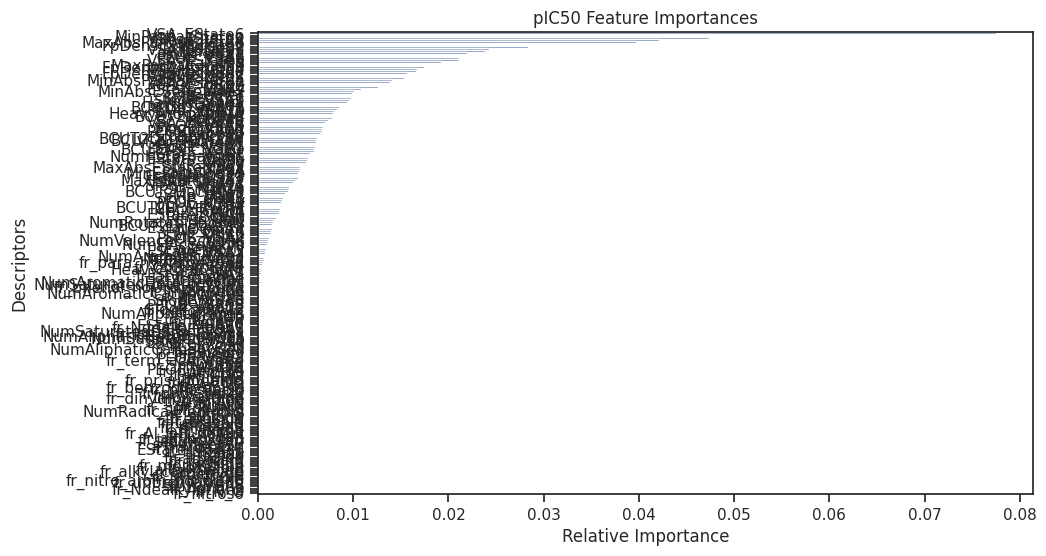

In [205]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Descriptors')
plt.title("pIC50 Feature Importances")
plt.show()

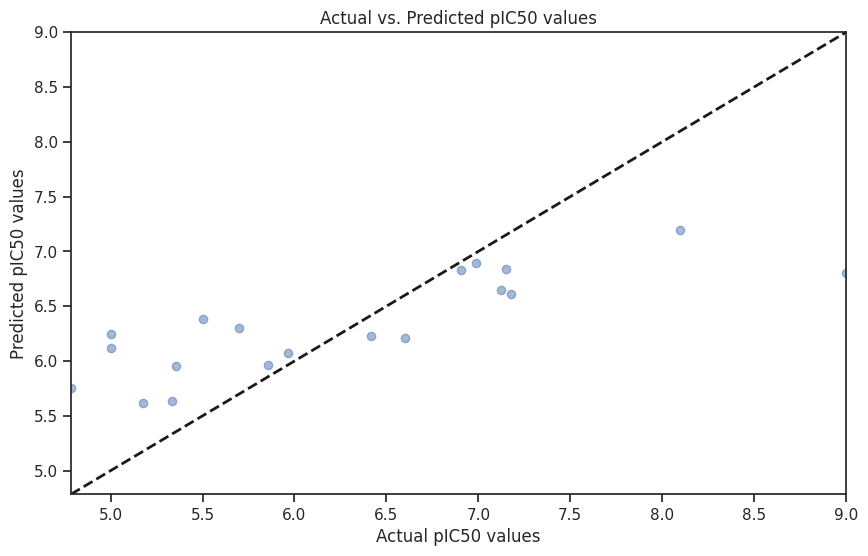

In [206]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, c='b', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual pIC50 values')
plt.ylabel('Predicted pIC50 values')
plt.title('Actual vs. Predicted pIC50 values')
plt.xlim(Y_test.min(), Y_test.max())
plt.ylim(Y_test.min(), Y_test.max())
plt.show()

In [207]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [208]:
# Replace inf and -inf in X with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
X = X.dropna()

In [209]:
Y = Y.dropna()

# Concatenate X and df_Y
df_combined = pd.concat([X, Y], axis=1)

df_combined

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,8.486536,-3.552159,8.486536,0.310999,0.780515,310.357,292.213,310.142976,118,0,...,0,0,0,0,0,0,0,0,0,5.176526
1,8.720437,-3.950016,8.720437,0.118565,0.713373,349.866,325.674,349.166938,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,8.806559,-4.516695,8.806559,0.676743,0.586244,393.491,366.275,393.216475,152,0,...,0,0,0,0,0,0,0,0,0,5.000000
3,13.265941,-4.298858,13.265941,0.554017,0.646831,378.860,355.676,378.145868,140,0,...,0,0,0,0,0,0,0,0,0,5.045757
4,8.637231,-3.572422,8.637231,0.278851,0.516477,363.848,345.704,363.113840,130,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,8.301193,-3.561504,8.301193,0.341167,0.859932,262.313,244.169,262.142976,102,0,...,0,0,0,0,0,0,0,0,0,5.596879
87,8.140921,-3.147222,8.140921,0.053605,0.909970,253.689,241.593,253.061804,90,0,...,0,0,0,0,0,0,0,0,0,4.619789
88,8.227293,-3.289542,8.227293,0.114369,0.940611,312.167,298.055,311.026939,96,0,...,0,0,0,0,0,0,0,0,0,5.333482
89,8.347489,-3.660754,8.347489,0.487000,0.844649,276.340,256.180,276.158626,108,0,...,0,0,0,0,0,0,0,0,0,4.301030


In [210]:
# Separate X and Y
X = df_combined.iloc[:,:-1]
Y = df_combined.iloc[:,-1]

In [211]:
# Standardizing the data to prevent large values from causing issues
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [212]:
# Set up the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [213]:
# Cross validation setup with 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [214]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_scaled, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [216]:
# Output the scores
print("Cross-Validation Scores:", -scores)  # Negate to get positive MSE values
print("Mean Score:", -scores.mean())

Cross-Validation Scores: [0.62307383 0.65066379 0.60825012 0.69796727 0.6757402 ]
Mean Score: 0.6511390420012374


In [273]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving Phytochemicals.csv to Phytochemicals.csv


In [274]:
# Load CSV file with a different encoding
df_Phytochemicals = pd.read_csv('Phytochemicals.csv', encoding='ISO-8859-1')

In [275]:
df_Phytochemicals.head()

,Phytochemical Names,SMILES
0,(E)-beta-Farnesene,CC(=CCC/C(=C/CCC(=C)C=C)/C)C
1,+-delta-Cadinene,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C
2,delta-Elemene,CC(C)C1=C[C@@H]([C@@](CC1)(C)C=C)C(=C)C
3,2-methoxy-4-vinylphenol,COC1=C(C=CC(=C1)C=C)O
4,(-)-alpha-Cedrene,C[C@@H]1CC[C@@H]2[C@]13CC=C([C@H](C3)C2(C)C)C


In [276]:
# Function to compute molecular descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    if mol is None:
        return None * len(descriptor_names)
    else:
        return calc.CalcDescriptors(mol)

In [277]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

In [278]:
# Define the list of descriptor names to calculate
descriptor_names = [desc_names[0] for desc_names in Descriptors._descList]
len(descriptor_names)

208

In [279]:
# Apply the descriptor computation function to each SMILES string and convert the result to a list
df_Phytochemicals['DescriptorNames'] = df_Phytochemicals['SMILES'].apply(compute_descriptors).to_list()

In [280]:
df_Phytochemicals.head()

,Phytochemical Names,SMILES,DescriptorNames
0,(E)-beta-Farnesene,CC(=CCC/C(=C/CCC(=C)C=C)/C)C,"(3.8985639942769272, 1.0312349615772234, 3.898..."
1,+-delta-Cadinene,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,"(2.5616666666666665, 0.784722222222222, 2.5616..."
2,delta-Elemene,CC(C)C1=C[C@@H]([C@@](CC1)(C)C=C)C(=C)C,"(4.123617252456539, 0.2125231481481482, 4.1236..."
3,2-methoxy-4-vinylphenol,COC1=C(C=CC(=C1)C=C)O,"(9.171178193499621, 0.15101851851851866, 9.171..."
4,(-)-alpha-Cedrene,C[C@@H]1CC[C@@H]2[C@]13CC=C([C@H](C3)C2(C)C)C,"(2.567199074074074, 0.5712731481481481, 2.5671..."


In [281]:
# Split the descriptors into individual columns
df_DescriptorNames = pd.DataFrame(df_Phytochemicals['DescriptorNames'].tolist(), columns=descriptor_names)

In [282]:
df_DescriptorNames.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.898564,1.031235,3.898564,1.031235,0.394675,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
1,2.561667,0.784722,2.561667,0.784722,0.541846,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
2,4.123617,0.212523,4.123617,0.212523,0.582048,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
3,9.171178,0.151019,9.171178,0.151019,0.698637,150.177,140.097,150.068080,58,0,...,0,0,0,0,0,0,0,0,0,0
4,2.567199,0.571273,2.567199,0.571273,0.512513,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
# Get all columns of df_ligands except the last one
cols_to_use = df_Phytochemicals.columns[:-1]

# Merge DataFrames using the specified columns
df_PhytochemicalsMERGED = pd.merge(df_Phytochemicals[cols_to_use], df_DescriptorNames, left_index=True, right_index=True)
df_PhytochemicalsMERGED.head()

,Phytochemical Names,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,(E)-beta-Farnesene,CC(=CCC/C(=C/CCC(=C)C=C)/C)C,3.898564,1.031235,3.898564,1.031235,0.394675,204.357,180.165,204.187801,...,0,0,0,0,0,0,0,0,0,0
1,+-delta-Cadinene,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,2.561667,0.784722,2.561667,0.784722,0.541846,204.357,180.165,204.187801,...,0,0,0,0,0,0,0,0,0,0
2,delta-Elemene,CC(C)C1=C[C@@H]([C@@](CC1)(C)C=C)C(=C)C,4.123617,0.212523,4.123617,0.212523,0.582048,204.357,180.165,204.187801,...,0,0,0,0,0,0,0,0,0,0
3,2-methoxy-4-vinylphenol,COC1=C(C=CC(=C1)C=C)O,9.171178,0.151019,9.171178,0.151019,0.698637,150.177,140.097,150.068080,...,0,0,0,0,0,0,0,0,0,0
4,(-)-alpha-Cedrene,C[C@@H]1CC[C@@H]2[C@]13CC=C([C@H](C3)C2(C)C)C,2.567199,0.571273,2.567199,0.571273,0.512513,204.357,180.165,204.187801,...,0,0,0,0,0,0,0,0,0,0


In [284]:
# Save the DataFrame with descriptors into a new CSV file
df_PhytochemicalsMERGED.to_csv('PhytochemicalsMERGED.csv', index=False)

In [285]:
# Display confirmation
print("DataFrame with descriptors saved to 'PhytochemicalsMERGED.csv'.")

DataFrame with descriptors saved to 'PhytochemicalsMERGED.csv'.


In [286]:
# Check which columns exists in the DataFrame
print(df_PhytochemicalsMERGED.columns)

Index(['Phytochemical Names', 'SMILES', 'MaxEStateIndex', 'MinEStateIndex',
       'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=210)


In [287]:
# Assuming you have X_train and Y_train for refitting the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [288]:
# Now predict the pIC50 for the new phytochemicals
new_phytochemicals_pIC50 = rf_model.predict(df_PhytochemicalsMERGED[X_train.columns])

In [289]:
print(new_phytochemicals_pIC50)

[6.53083209 6.71668611 6.97552357 6.38678312 6.80170061 6.80170061
 6.79323758 6.68550331 6.89734628 6.87099899 6.54040518 6.93075912
 6.74081393 7.08353611 6.93075912 6.88068484 6.88068484 6.88068484
 6.29894027 6.69748208 6.83901014 6.09394125 6.88400859 6.01632821
 6.04202798 6.86715277 6.48779304 6.71344154 6.10760677 6.63145123
 6.27240111 6.23961523 6.18875721 6.19787432 6.10893774 5.83626944
 6.61738825 5.92787667 6.2058729  6.02135956 6.00419953 6.94544606
 6.01650679 7.00671846 5.84796932 6.83417005 6.83901014 5.79852455
 6.64569983 6.29147548 6.56656932 6.55469177 6.15892032]


In [290]:
# Add predictions to the original DataFrame
df_PhytochemicalsMERGED['Predicted_pIC50'] = new_phytochemicals_pIC50

In [291]:
# Display the ligands and predicted pIC50
print(df_PhytochemicalsMERGED[['Predicted_pIC50']])

    Predicted_pIC50
0          6.530832
1          6.716686
2          6.975524
3          6.386783
4          6.801701
5          6.801701
6          6.793238
7          6.685503
8          6.897346
9          6.870999
10         6.540405
11         6.930759
12         6.740814
13         7.083536
14         6.930759
15         6.880685
16         6.880685
17         6.880685
18         6.298940
19         6.697482
20         6.839010
21         6.093941
22         6.884009
23         6.016328
24         6.042028
25         6.867153
26         6.487793
27         6.713442
28         6.107607
29         6.631451
30         6.272401
31         6.239615
32         6.188757
33         6.197874
34         6.108938
35         5.836269
36         6.617388
37         5.927877
38         6.205873
39         6.021360
40         6.004200
41         6.945446
42         6.016507
43         7.006718
44         5.847969
45         6.834170
46         6.839010
47         5.798525
48         6.645700


In [292]:
print(df_PhytochemicalsMERGED.head())

       Phytochemical Names                                         SMILES  \
0       (E)-beta-Farnesene                   CC(=CCC/C(=C/CCC(=C)C=C)/C)C   
1         +-delta-Cadinene           CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C   
2            delta-Elemene        CC(C)C1=C[C@@H]([C@@](CC1)(C)C=C)C(=C)C   
3  2-methoxy-4-vinylphenol                          COC1=C(C=CC(=C1)C=C)O   
4        (-)-alpha-Cedrene  C[C@@H]1CC[C@@H]2[C@]13CC=C([C@H](C3)C2(C)C)C   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        3.898564        1.031235           3.898564           1.031235   
1        2.561667        0.784722           2.561667           0.784722   
2        4.123617        0.212523           4.123617           0.212523   
3        9.171178        0.151019           9.171178           0.151019   
4        2.567199        0.571273           2.567199           0.571273   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  ...  fr_sulfonamd  \
0  0.394675  20

In [293]:
import pandas as pd
from google.colab import files

In [294]:
# Create a DataFrame for pIC50
df_pIC50 = pd.DataFrame({'Predicted_pIC50': new_phytochemicals_pIC50})  # Replace 'new_phytochemicals_pIC50' with your actual predictions

In [295]:
# Export the DataFrame to an Excel file
df_pIC50.to_excel('Phytochemicals_Predicted_pIC50.xlsx', index=False)

# Download the Excel file
files.download('Phytochemicals_Predicted_pIC50.xlsx')

print(df_pIC50.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Predicted_pIC50
0         6.530832
1         6.716686
2         6.975524
3         6.386783
4         6.801701


In [296]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving Known ligand.csv to Known ligand.csv


In [297]:
# Load CSV file with a different encoding
df_Knownligand = pd.read_csv('Known ligand.csv', encoding='ISO-8859-1')

In [298]:
df_Knownligand.head()

,Known Ligand,SMILES
0,Terzosin,COC1=C(C=C2C(=C1)C(=NC(=N2)N3CCN(CC3)C(=O)C4CC...


In [299]:
# Function to compute molecular descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    if mol is None:
        return None * len(descriptor_names)
    else:
        return calc.CalcDescriptors(mol)

In [300]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

In [301]:
# Define the list of descriptor names to calculate
descriptor_names = [desc_names[0] for desc_names in Descriptors._descList]
len(descriptor_names)

208

In [302]:
# Apply the descriptor computation function to each SMILES string and convert the result to a list
df_Knownligand['DescriptorNames'] = df_Knownligand['SMILES'].apply(compute_descriptors).to_list()

In [303]:
df_Knownligand.head()

,Known Ligand,SMILES,DescriptorNames
0,Terzosin,COC1=C(C=C2C(=C1)C(=NC(=N2)N3CCN(CC3)C(=O)C4CC...,"(12.508819624652265, -0.2763346534838935, 12.5..."


In [304]:
# Split the descriptors into individual columns
df_DescriptorNames = pd.DataFrame(df_Phytochemicals['DescriptorNames'].tolist(), columns=descriptor_names)

In [305]:
df_DescriptorNames.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.898564,1.031235,3.898564,1.031235,0.394675,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
1,2.561667,0.784722,2.561667,0.784722,0.541846,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
2,4.123617,0.212523,4.123617,0.212523,0.582048,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
3,9.171178,0.151019,9.171178,0.151019,0.698637,150.177,140.097,150.068080,58,0,...,0,0,0,0,0,0,0,0,0,0
4,2.567199,0.571273,2.567199,0.571273,0.512513,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
# Get all columns of df_ligands except the last one
cols_to_use = df_Knownligand.columns[:-1]

# Merge DataFrames using the specified columns
df_KnownligandMERGED = pd.merge(df_Knownligand[cols_to_use], df_DescriptorNames, left_index=True, right_index=True)
df_KnownligandMERGED.head()

,Known Ligand,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Terzosin,COC1=C(C=C2C(=C1)C(=NC(=N2)N3CCN(CC3)C(=O)C4CC...,3.898564,1.031235,3.898564,1.031235,0.394675,204.357,180.165,204.187801,...,0,0,0,0,0,0,0,0,0,0


In [307]:
# Save the DataFrame with descriptors into a new CSV file
df_KnownligandMERGED.to_csv('KnownligandMERGED.csv', index=False)

In [308]:
# Display confirmation
print("DataFrame with descriptors saved to 'KnownligandMERGED.csv'.")

DataFrame with descriptors saved to 'KnownligandMERGED.csv'.


In [309]:
# Check which columns exists in the DataFrame
print(df_KnownligandMERGED.columns)

Index(['Known Ligand', 'SMILES', 'MaxEStateIndex', 'MinEStateIndex',
       'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=210)


In [310]:
# Assuming you have X_train and Y_train for refitting the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [311]:
# Now predict the pIC50 for the new phytochemicals
new_Knownligand_pIC50 = rf_model.predict(df_KnownligandMERGED[X_train.columns])

In [312]:
print(new_Knownligand_pIC50)

[6.53083209]


In [314]:
# Add predictions to the original DataFrame
df_KnownligandMERGED['Predicted_pIC50'] = new_Knownligand_pIC50

In [315]:
# Display the ligands and predicted pIC50
print(df_KnownligandMERGED[['Predicted_pIC50']])

   Predicted_pIC50
0         6.530832


In [316]:
print(df_KnownligandMERGED.head())

  Known Ligand                                             SMILES  \
0     Terzosin  COC1=C(C=C2C(=C1)C(=NC(=N2)N3CCN(CC3)C(=O)C4CC...   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        3.898564        1.031235           3.898564           1.031235   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  ...  fr_sulfonamd  \
0  0.394675  204.357         180.165  204.187801  ...             0   

   fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
0           0                  0             0            0            0   

   fr_thiophene  fr_unbrch_alkane  fr_urea  Predicted_pIC50  
0             0                 0        0         6.530832  

[1 rows x 211 columns]


In [317]:
import pandas as pd
from google.colab import files

In [318]:
# Create a DataFrame for pIC50
df_Knownligand_pIC50 = pd.DataFrame({'Predicted_pIC50': new_Knownligand_pIC50})  # Replace 'new_Knownligand_pIC50' with your actual predictions

In [319]:
#Export the DataFrame to an Excel file
df_Knownligand_pIC50.to_excel('Knownligand_Predicted_pIC50.xlsx', index=False)

# Download the Excel file
files.download('Knownligand_Predicted_pIC50.xlsx')

print(df_Knownligand_pIC50.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Predicted_pIC50
0         6.530832


In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load CSV file
df_Pr_pIC50 = pd.read_csv('Predicted_pIC50.csv')